In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **load datasets**

In [6]:
df = pd.read_csv('/content/drive/MyDrive/movies.csv', parse_dates=['release_date'])
df

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director'],
      dtype='object')

In [3]:
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.000000,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000,44691.000000
mean,107186.242845,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090,10.313643
std,111806.362236,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663,15.892154
min,2.000000,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,26033.500000,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000,2.000000
50%,59110.000000,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000,6.000000
75%,154251.000000,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000,12.000000
max,469172.000000,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000


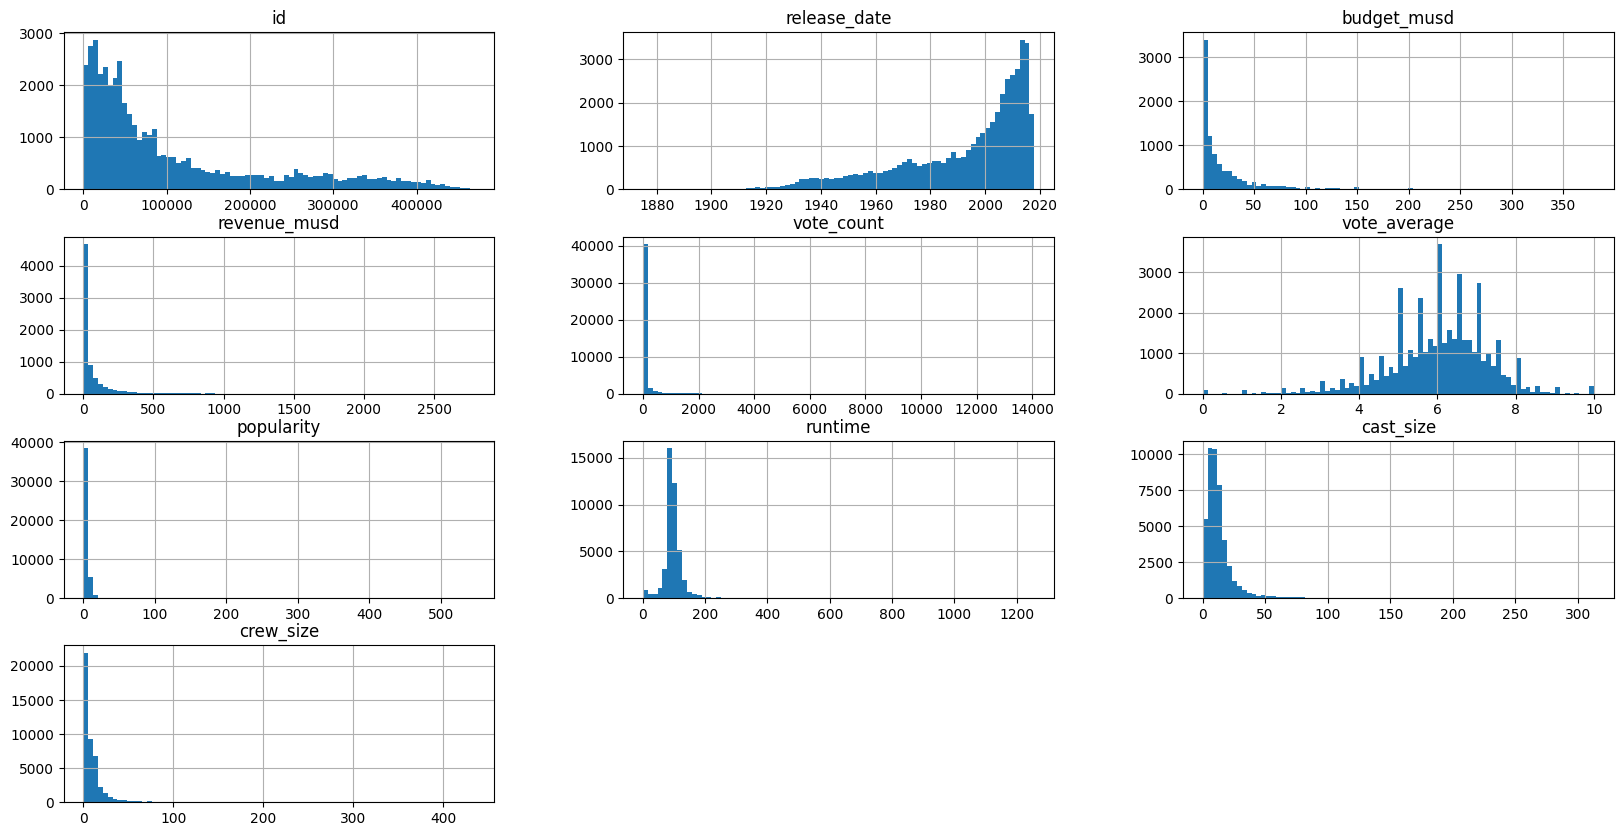

In [4]:
df.hist(figsize = (20, 10), bins = 80)
plt.show()

In [5]:
df.budget_musd.value_counts(dropna=False).head(5)

NaN     35837
5.0       286
10.0      258
20.0      243
2.0       241
Name: budget_musd, dtype: int64

In [6]:
df.vote_average.value_counts(dropna = False).head()

NaN    2614
6.0    2421
5.0    1969
7.0    1859
6.5    1705
Name: vote_average, dtype: int64

In [7]:
df.runtime.value_counts(dropna = False).head()

90.0     2527
NaN      1512
100.0    1457
95.0     1395
93.0     1200
Name: runtime, dtype: int64

In [8]:
df.isna().sum()

id                           0
title                        0
tagline                  24407
release_date                34
genres                    2105
belongs_to_collection    40228
original_language           10
budget_musd              35837
revenue_musd             37306
production_companies     11335
production_countries      5856
vote_count                   0
vote_average              2614
popularity                   0
runtime                   1512
overview                   951
spoken_languages          3597
poster_path                224
cast                      2189
cast_size                    0
crew_size                    0
director                   731
dtype: int64

In [9]:
df_best = df[['poster_path', 'title', 'budget_musd', 'revenue_musd', 'vote_count', 'vote_average', 'popularity']].copy()
df_best.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519


In [10]:
df_best['profit'] = df_best['revenue_musd'] - df_best['budget_musd']
df_best['return'] = (df_best['profit'] - df_best['budget_musd']) / (df_best['budget_musd'])
df_best.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit,return
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943,343.554033,10.451801
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539,197.797249,2.043035
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495,65.452156,3.090760
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN


In [11]:
df_best.columns = ['img_address', 'title', 'budget', 'revenue', 'votes', 'avg_rating', 'popularity', 'profit', 'roi']

In [12]:
df_best.set_index('title', inplace = True)
df_best.head()

,img_address,budget,revenue,votes,avg_rating,popularity,profit,roi
title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415.0,7.7,21.946943,343.554033,10.451801
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413.0,6.9,17.015539,197.797249,2.043035
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34.0,6.1,3.859495,65.452156,3.090760
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN


In [13]:
subset = df_best.iloc[:5, :2]
subset

,img_address,budget
title,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN


In [14]:
from IPython.display import HTML
HTML(subset.to_html(escape=False))

,img_address,budget
title,,
Toy Story,,30.0
Jumanji,,65.0
Grumpier Old Men,,NaN
Waiting to Exhale,,16.0
Father of the Bride Part II,,NaN


In [15]:
df_best.sort_values(by = 'avg_rating', ascending=False)

,img_address,budget,revenue,votes,avg_rating,popularity,profit,roi
title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,NaN,NaN,1.0,10.0,0.036471,NaN,NaN
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2...,NaN,NaN,1.0,10.0,0.318826,NaN,NaN
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifP...,NaN,NaN,1.0,10.0,0.036680,NaN,NaN
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOc...,NaN,NaN,1.0,10.0,1.783625,NaN,NaN
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH...,NaN,NaN,2.0,10.0,0.476007,NaN,NaN
...,...,...,...,...,...,...,...,...
Altar of Fire,<img src='http://image.tmdb.org/t/p/w185//iJ78...,NaN,NaN,0.0,NaN,0.000000,NaN,NaN
The Wonders of Aladdin,<img src='http://image.tmdb.org/t/p/w185//AvfX...,NaN,NaN,0.0,NaN,0.093498,NaN,NaN
Deep Hearts,<img src='http://image.tmdb.org/t/p/w185//8jI4...,NaN,NaN,0.0,NaN,0.011025,NaN,NaN


In [16]:
df_best.sort_values(by = 'roi', ascending=False)


,img_address,budget,revenue,votes,avg_rating,popularity,profit,roi
title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,0.000001,12.396383,77.0,6.1,4.028679,12.396382,1.239638e+07
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,0.000001,8.500000,881.0,8.1,8.159556,8.499999,8.499998e+06
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,0.000008,33.579813,49.0,7.7,4.222195,33.579805,4.197475e+06
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,0.000001,2.755584,3.0,6.0,0.230075,2.755583,2.755582e+06
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,0.000113,115.103979,457.0,5.9,9.231318,115.103866,1.018617e+06
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.0,3.8,0.903007,NaN,NaN


In [17]:
df_best.loc[df_best.budget >= 10].sort_values(by = 'roi', ascending=False)

,img_address,budget,revenue,votes,avg_rating,popularity,profit,roi
title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.500000,792.965326,3359.0,7.3,19.358546,782.465326,73.520507
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.000000,775.398007,6778.0,8.1,42.149697,764.398007,68.490728
Pretty Woman,<img src='http://image.tmdb.org/t/p/w185//hMVM...,14.000000,463.000000,1807.0,7.0,13.348451,449.000000,31.071429
The Intouchables,<img src='http://image.tmdb.org/t/p/w185//w7Wx...,13.000000,426.480871,5410.0,8.2,16.086919,413.480871,30.806221
The Empire Strikes Back,<img src='http://image.tmdb.org/t/p/w185//7BuH...,18.000000,538.400000,5998.0,8.2,19.470959,520.400000,27.911111
...,...,...,...,...,...,...,...,...
Jesus,<img src='http://image.tmdb.org/t/p/w185//gICg...,20.000000,NaN,8.0,5.4,2.524781,NaN,NaN
Security,<img src='http://image.tmdb.org/t/p/w185//9FN5...,15.000000,NaN,113.0,6.0,47.114366,NaN,NaN
Sunstroke,<img src='http://image.tmdb.org/t/p/w185//fRtO...,21.000000,NaN,6.0,3.9,0.528909,NaN,NaN


In [18]:
df_best.budget.fillna(0, inplace = True)
df_best.votes.fillna(0, inplace = True)

In [19]:
df_best.sort_values(by = 'roi', ascending=False)

,img_address,budget,revenue,votes,avg_rating,popularity,profit,roi
title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,0.000001,12.396383,77.0,6.1,4.028679,12.396382,1.239638e+07
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,0.000001,8.500000,881.0,8.1,8.159556,8.499999,8.499998e+06
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,0.000008,33.579813,49.0,7.7,4.222195,33.579805,4.197475e+06
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,0.000001,2.755584,3.0,6.0,0.230075,2.755583,2.755582e+06
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,0.000113,115.103979,457.0,5.9,9.231318,115.103866,1.018617e+06
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,0.000000,NaN,1.0,4.0,0.072051,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,0.000000,NaN,3.0,9.0,0.178241,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,0.000000,NaN,6.0,3.8,0.903007,NaN,NaN


In [20]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   img_address  44467 non-null  object 
 1   budget       44691 non-null  float64
 2   revenue      7385 non-null   float64
 3   votes        44691 non-null  float64
 4   avg_rating   42077 non-null  float64
 5   popularity   44691 non-null  float64
 6   profit       5371 non-null   float64
 7   roi          5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [21]:
def best_worst(n, by, ascending = False, min_budget = 0, min_votes = 0):
  df_prime = df_best.loc[(df_best.budget >= min_budget) & (df_best.votes >= min_votes), ['img_address',by]].sort_values(by = by, ascending = ascending).head(n).copy()
  return HTML(df_prime.to_html(escape = False))

In [22]:
best_worst(n=5, by='popularity')

,img_address,popularity
title,,
Minions,,547.488298
Wonder Woman,,294.337037
Beauty and the Beast,,287.253654
Baby Driver,,228.032744
Big Hero 6,,213.849907


In [23]:
mask_genres = df.genres.str.contains('Comedy') & df.genres.str.contains('Family')
mask_genres.value_counts()

False    43507
True      1184
Name: genres, dtype: int64

In [24]:
mask_actor = df.cast.str.contains('Tom Hanks')
mask_actor.value_counts()

False    42431
True        71
Name: cast, dtype: int64

In [25]:
Hanks = df.loc[mask_actor & mask_genres, ['title', 'poster_path', 'vote_average']].sort_values(by= 'vote_average', ascending = False)

In [26]:
HTML(Hanks.to_html(escape = False))

,title,poster_path,vote_average
0,Toy Story,,7.7
15236,Toy Story 3,,7.6
25515,Partysaurus Rex,,7.4
2969,Toy Story 2,,7.3
21697,Toy Story of Terror!,,7.3
2655,Big,,6.9
11875,The Simpsons Movie,,6.9
10898,Cars,,6.6
4507,Turner & Hooch,,5.9


In [27]:
mask_director = df.director == 'Quentin Tarantino'
mask_director.value_counts()

False    44681
True        10
Name: director, dtype: int64

In [28]:
mask_actor = df.cast.str.contains('Uma Thurman')
mask_actor.value_counts()

False    42456
True        46
Name: cast, dtype: int64

In [29]:
quentin = df.loc[mask_director & mask_actor, ['title', 'poster_path', 'runtime']].sort_values(by = 'runtime').set_index('title')
HTML(quentin.to_html(escape=False))

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.0
Kill Bill: Vol. 2,,136.0
Pulp Fiction,,154.0


In [30]:
mask_studio = df.production_companies.str.contains('Pixar').fillna(False)

In [31]:
mask_time = df.release_date.between('2010-01-01', '2015-12-31')

In [32]:
pixar = df.loc[mask_studio & mask_time, ['title', 'poster_path', 'revenue_musd', 'release_date']].sort_values(by = 'revenue_musd').set_index('title')
HTML(pixar.to_html(escape=False))

,poster_path,revenue_musd,release_date
title,,,
The Good Dinosaur,,331.926147,2015-11-14
Brave,,538.983207,2012-06-21
Cars 2,,559.852396,2011-06-11
Monsters University,,743.559607,2013-06-20
Inside Out,,857.611174,2015-06-09
Toy Story 3,,1066.969703,2010-06-16
Day & Night,,NaN,2010-06-17
The Blue Umbrella,,NaN,2013-02-12
Toy Story of Terror!,,NaN,2013-10-15


In [33]:
mask_genres = df.genres.str.contains('Action') | df.genres.str.contains('Thriller')
mask_language = df.original_language == 'en'
mask_vote_avg = df.vote_average >= 7.5
mask_vote_count = df.vote_count >= 10

In [34]:
next_movie = df.loc[mask_genres & mask_language & mask_vote_avg & mask_vote_count, ['title', 'poster_path', 'genres',
                                                                                    'vote_average', 'vote_count', 'release_date']].sort_values(by= 'release_date',
                                                                                                                                               ascending=False).set_index('title').head()

In [35]:
HTML(next_movie.to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.5,171.0,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.5,2712.0,2017-07-19
The Book of Henry,,Thriller|Drama|Crime,7.6,84.0,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.6,4858.0,2017-04-19
Logan,,Action|Drama|Science Fiction,7.6,6310.0,2017-02-28


In [36]:
from wordcloud import WordCloud

In [37]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [38]:
title_join = " ".join(title)
overview_join = " ".join(overview)
tagline_join = " ".join(tagline)

In [39]:
title_wordcloud = WordCloud(background_color= 'white', height = 4000, max_words= 210).generate(title_join)

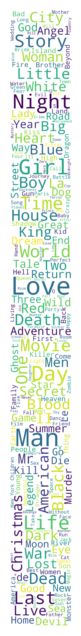

In [40]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

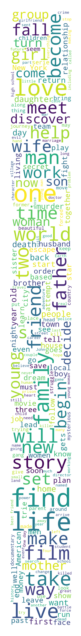

In [41]:
overview_wordcloud = WordCloud(background_color= 'white', height = 4000, max_words= 210).generate(overview_join)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

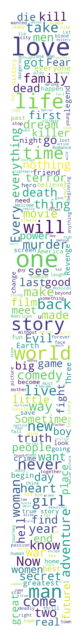

In [42]:
tagline_wordcloud = WordCloud(background_color= 'white', height = 4000, max_words= 210).generate(tagline_join)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
df['franchise'] = df.belongs_to_collection.notna()

In [44]:
df['franchise'].value_counts()

False    40228
True      4463
Name: franchise, dtype: int64

In [45]:
df.groupby('franchise').revenue_musd.mean()

franchise
False     44.742814
True     165.708193
Name: revenue_musd, dtype: float64

In [46]:
df['profit'] = df['revenue_musd'] - df['budget_musd']
df['roi'] = (df['profit'] - df['budget_musd']) / (df['budget_musd'])
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,franchise,profit,roi
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,True,343.554033,10.451801
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,False,197.797249,2.043035
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,True,NaN,NaN
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker,False,65.452156,3.090760
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer,True,NaN,NaN


In [47]:
df.groupby('franchise').roi.mean()

franchise
False    6964.390650
True      854.404622
Name: roi, dtype: float64

In [48]:
df.groupby('franchise').budget_musd.mean()

franchise
False    18.047741
True     38.319847
Name: budget_musd, dtype: float64

In [49]:
df.groupby('franchise').popularity.mean()

franchise
False    2.592726
True     6.245051
Name: popularity, dtype: float64

In [50]:
df.groupby('franchise').vote_average.mean()

franchise
False    6.008787
True     5.956806
Name: vote_average, dtype: float64

In [51]:
df.groupby('franchise').agg({'budget_musd':'mean', 'revenue_musd': 'mean', 'vote_average': 'mean',
                             'popularity': 'mean', 'roi': 'mean', 'vote_count': 'mean'})

,budget_musd,revenue_musd,vote_average,popularity,roi,vote_count
franchise,,,,,,
False,18.047741,44.742814,6.008787,2.592726,6964.390650,78.289550
True,38.319847,165.708193,5.956806,6.245051,854.404622,412.387856


In [52]:
df.belongs_to_collection.value_counts()

The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: belongs_to_collection, Length: 1691, dtype: int64

In [53]:
franchise = df.groupby('belongs_to_collection').agg({'title': 'count', 'budget_musd': ['sum', 'mean'],
                                                     'revenue_musd': ['sum', 'mean'], 'vote_average': 'mean',
                                                     'popularity': 'mean', 'roi': 'mean', 'vote_count': 'mean'})

In [54]:
franchise

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2       130.0  65.0   366.780087   
00 Schneider Filmreihe                   1         0.0   NaN     0.000000   
08/15 Collection                         1         0.0   NaN     0.000000   
100 Girls Collection                     2         0.0   NaN     0.000000   
101 Dalmatians (Animated) Collection     2         4.0   4.0   215.880014   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1         0.0   NaN     0.000000   
Чебурашка и крокодил Гена                1         0.0   NaN     0.000000   
Что Творят мужчины! (Коллекция)          2         2.0   2.0     0.000000   
男はつらいよ シリーズ                              3         0.0   NaN     0.000000   
식객 시리즈                                   2         0.0   NaN     0.000000   

                                                 vote_average popularity  \
                                            mean         mean       mean   
belongs_to_collection                                                      
... Has Fallen Collection             183.390043         6.00  13.008090   
00 Schneider Filmreihe                       NaN         6.50   1.931299   
08/15 Collection                             NaN         5.90   0.628127   
100 Girls Collection                         NaN         5.15   3.078652   
101 Dalmatians (Animated) Collection  215.880014         6.25  13.063212   
...                                          ...          ...        ...   
Сказки Чуковского                            NaN         3.00   0.731334   
Чебурашка и крокодил Гена                    NaN         6.70   0.881504   
Что Творят мужчины! (Коллекция)              NaN         3.15   1.299605   
男はつらいよ シリーズ                                  NaN         7.00   0.038901   
식객 시리즈                                       NaN         4.95   0.157245   

                                            roi   vote_count  
                                           mean         mean  
belongs_to_collection                                         
... Has Fallen Collection              0.864804  2333.000000  
00 Schneider Filmreihe                      NaN    16.000000  
08/15 Collection                            NaN     4.000000  
100 Girls Collection                        NaN    64.000000  
101 Dalmatians (Animated) Collection  51.970003   937.000000  
...                                         ...          ...  
Сказки Чуковского                           NaN     3.000000  
Чебурашка и крокодил Гена                   NaN     7.000000  
Что Творят мужчины! (Коллекция)             NaN     5.500000  
男はつらいよ シリーズ                                 NaN     0.666667  
식객 시리즈                                      NaN     3.500000  

[1691 rows x 9 columns]

In [55]:
franchise.nlargest(20, ('title', 'count'))

title budget_musd             \
                                       count         sum       mean   
belongs_to_collection                                                 
The Bowery Boys                           29      0.0000        NaN   
Totò Collection                           27      0.0000        NaN   
James Bond Collection                     26   1539.6500  59.217308   
Zatôichi: The Blind Swordsman             26      0.0000        NaN   
The Carry On Collection                   25      0.0000        NaN   
Charlie Chan (Sidney Toler) Collection    21      0.0000        NaN   
Pokémon Collection                        20    250.7204  50.144080   
Godzilla (Showa) Collection               16      2.8100   0.562000   
Charlie Chan (Warner Oland) Collection    15      0.0000        NaN   
Dragon Ball Z (Movie) Collection          15      5.0000   5.000000   
Uuno Turhapuro                            15      0.0000        NaN   
Monster High Collection                   14      0.5000   0.500000   
The Land Before Time Collection           14     12.3000  12.300000   
George Carlin Comedy Collection           13      0.0000        NaN   
Sharpe Collection                         13      0.0000        NaN   
Friday the 13th Collection                12     84.4000   7.033333   
Johan Falk GSI Collection                 12      0.0000        NaN   
Sherlock Holmes (1939 series)             12      0.0000        NaN   
The Amityville Horror Collection          12     21.0200   5.255000   
An American Girl Collection               10      6.8000   6.800000   

                                       revenue_musd             vote_average  \
                                                sum        mean         mean   
belongs_to_collection                                                          
The Bowery Boys                            0.000000         NaN     6.675000   
Totò Collection                            0.000000         NaN     6.837037   
James Bond Collection                   7106.970239  273.345009     6.338462   
Zatôichi: The Blind Swordsman              0.000000         NaN     6.403846   
The Carry On Collection                    0.000000         NaN     6.168000   
Charlie Chan (Sidney Toler) Collection     0.000000         NaN     6.609524   
Pokémon Collection                       601.865958   66.873995     6.055000   
Godzilla (Showa) Collection                0.000000         NaN     5.975000   
Charlie Chan (Warner Oland) Collection     0.000000         NaN     6.658333   
Dragon Ball Z (Movie) Collection         112.121192   56.060596     6.606667   
Uuno Turhapuro                             0.000000         NaN     5.526667   
Monster High Collection                    0.000000         NaN     6.485714   
The Land Before Time Collection           84.460846   84.460846     6.164286   
George Carlin Comedy Collection            0.000000         NaN     7.469231   
Sharpe Collection                          0.000000         NaN     6.738462   
Friday the 13th Collection               464.898544   38.741545     5.425000   
Johan Falk GSI Collection                  0.000000         NaN     6.500000   
Sherlock Holmes (1939 series)              0.000000         NaN     6.925000   
The Amityville Horror Collection         213.347083   53.336771     4.358333   
An American Girl Collection                0.000000         NaN     5.250000   

                                       popularity        roi   vote_count  
                                             mean       mean         mean  
belongs_to_collection                                                      
The Bowery Boys                          0.198006        NaN     0.724138  
Totò Collection                          1.047324        NaN    18.037037  
James Bond Collection                   13.453502  11.159511  1284.307692  
Zatôichi: The Blind Swordsman            1.100603        NaN    11.192308  
The Carry On Collection         

In [56]:
franchise.nlargest(20, ('revenue_musd', 'sum'))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
Harry Potter Collection                 8     1280.00  160.000000   
Star Wars Collection                    8      854.35  106.793750   
James Bond Collection                  26     1539.65   59.217308   
The Fast and the Furious Collection     8     1009.00  126.125000   
Pirates of the Caribbean Collection     5     1250.00  250.000000   
Transformers Collection                 5      965.00  193.000000   
Despicable Me Collection                6      299.00   74.750000   
The Twilight Collection                 5      385.00   77.000000   
Ice Age Collection                      5      429.00   85.800000   
Jurassic Park Collection                4      379.00   94.750000   
Shrek Collection                        5      535.00  133.750000   
The Hunger Games Collection             4      490.00  122.500000   
The Hobbit Collection                   3      750.00  250.000000   
The Avengers Collection                 2      500.00  250.000000   
The Lord of the Rings Collection        3      266.00   88.666667   
X-Men Collection                        6      983.00  163.833333   
Avatar Collection                       1      237.00  237.000000   
Mission: Impossible Collection          5      650.00  130.000000   
Spider-Man Collection                   3      597.00  199.000000   
The Dark Knight Collection              3      585.00  195.000000   

                                    revenue_musd              vote_average  \
                                             sum         mean         mean   
belongs_to_collection                                                        
Harry Potter Collection              7707.367425   963.420928     7.537500   
Star Wars Collection                 7434.494790   929.311849     7.375000   
James Bond Collection                7106.970239   273.345009     6.338462   
The Fast and the Furious Collection  5125.098793   640.637349     6.662500   
Pirates of the Caribbean Collection  4521.576826   904.315365     6.880000   
Transformers Collection              4366.101244   873.220249     6.140000   
Despicable Me Collection             3691.070216   922.767554     6.783333   
The Twilight Collection              3342.107290   668.421458     5.840000   
Ice Age Collection                   3216.708553   643.341711     6.380000   
Jurassic Park Collection             3031.484143   757.871036     6.500000   
Shrek Collection                     2955.807008   738.951752     6.460000   
The Hunger Games Collection          2944.162634   736.040659     6.875000   
The Hobbit Collection                2935.523356   978.507785     7.233333   
The Avengers Collection              2924.961604  1462.480802     7.350000   
The Lord of the Rings Collection     2916.544743   972.181581     8.033333   
X-Men Collection                     2808.832317   468.138720     6.816667   
Avatar Collection                    2787.965087  2787.965087     7.200000   
Mission: Impossible Collection       2778.977995   555.795599     6.600000   
Spider-Man Collection                2496.346518   832.115506     6.466667   
The Dark Knight Collection           2463.716216   821.238739     7.800000   

                                     popularity        roi    vote_count  
                                           mean       mean          mean  
belongs_to_collection                                                     
Harry Potter Collection               26.253893   4.646341   5983.250000  
Star Wars Collection                  23.410919  17.099803   5430.375000  
James Bond Collection                 13.453502  11.159511   1284.307692  
The Fast and the Furious Collection   10.799435   2.690326   3197.000000  
Pirates of the Caribbean Collection   53.972237   1.883034   5016.000000  
Transformers Collection               14.425077   2.7

In [57]:
franchise.nlargest(20, ('budget_musd', 'sum'))

title budget_musd              \
                                        count         sum        mean   
belongs_to_collection                                                   
James Bond Collection                      26     1539.65   59.217308   
Harry Potter Collection                     8     1280.00  160.000000   
Pirates of the Caribbean Collection         5     1250.00  250.000000   
The Fast and the Furious Collection         8     1009.00  126.125000   
X-Men Collection                            6      983.00  163.833333   
Transformers Collection                     5      965.00  193.000000   
Star Wars Collection                        8      854.35  106.793750   
The Hobbit Collection                       3      750.00  250.000000   
The Terminator Collection                   5      661.40  132.280000   
Mission: Impossible Collection              5      650.00  130.000000   
Spider-Man Collection                       3      597.00  199.000000   
The Dark Knight Collection                  3      585.00  195.000000   
Captain America Collection                  3      560.00  186.666667   
The Chronicles of Narnia Collection         3      560.00  186.666667   
Iron Man Collection                         3      540.00  180.000000   
Shrek Collection                            5      535.00  133.750000   
Star Trek: Alternate Reality Collection     3      525.00  175.000000   
Madagascar Collection                       4      502.00  125.500000   
The Avengers Collection                     2      500.00  250.000000   
Cars Collection                             3      495.00  165.000000   

                                        revenue_musd               \
                                                 sum         mean   
belongs_to_collection                                               
James Bond Collection                    7106.970239   273.345009   
Harry Potter Collection                  7707.367425   963.420928   
Pirates of the Caribbean Collection      4521.576826   904.315365   
The Fast and the Furious Collection      5125.098793   640.637349   
X-Men Collection                         2808.832317   468.138720   
Transformers Collection                  4366.101244   873.220249   
Star Wars Collection                     7434.494790   929.311849   
The Hobbit Collection                    2935.523356   978.507785   
The Terminator Collection                1845.327738   369.065548   
Mission: Impossible Collection           2778.977995   555.795599   
Spider-Man Collection                    2496.346518   832.115506   
The Dark Knight Collection               2463.716216   821.238739   
Captain America Collection               2238.640841   746.213614   
The Chronicles of Narnia Collection      1584.144587   528.048196   
Iron Man Collection                      2424.547547   808.182516   
Shrek Collection                         2955.807008   738.951752   
Star Trek: Alternate Reality Collection  1196.517508   398.839169   
Madagascar Collection                    2257.054393   564.263598   
The Avengers Collection                  2924.961604  1462.480802   
Cars Collection                          1372.005602   457.335201   

                                        vote_average popularity        roi  \
                                                mean       mean       mean   
belongs_to_collection                                                        
James Bond Collection                       6.338462  13.453502  11.159511   
Harry Potter Collection                     7.537500  26.253893   4.646341   
Pirates of the Caribbean Collection         6.880000  53.972237   1.883034   
The Fast and the Furious Collection         6.662500  10.799435   2.690326   
X-Men Collection                            6.816667   9.707541   1.017084   
Transformers Collection                     6.140000  14.425077   2.718677   
Star Wars Collection                        7.375000  23.410919  17.09

In [58]:
franchise[franchise[('vote_count', 'mean')] >= 1000].nlargest(20, ('vote_average', 'mean'))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
The Lord of the Rings Collection        3      266.00   88.666667   
The Godfather Collection                3       73.00   24.333333   
Blade Runner Collection                 1       28.00   28.000000   
The Man With No Name Collection         3        2.00    0.666667   
The Dark Knight Collection              3      585.00  195.000000   
Guardians of the Galaxy Collection      2      370.00  185.000000   
Kill Bill Collection                    2       60.00   30.000000   
Kingsman Collection                     1       81.00   81.000000   
How to Train Your Dragon Collection     2      310.00  155.000000   
Harry Potter Collection                 8     1280.00  160.000000   
Toy Story Collection                    3      320.00  106.666667   
Back to the Future Collection           3       99.00   33.000000   
Trainspotting Collection                2       22.00   11.000000   
Deadpool Collection                     1       58.00   58.000000   
The Incredibles Collection              1       92.00   92.000000   
Star Wars Collection                    8      854.35  106.793750   
The Avengers Collection                 2      500.00  250.000000   
The Lego Movie Collection               2      140.00   70.000000   
Tangled Collection                      2      260.00  260.000000   
The Space Odyssey Series                2       38.50   19.250000   

                                    revenue_musd              vote_average  \
                                             sum         mean         mean   
belongs_to_collection                                                        
The Lord of the Rings Collection     2916.544743   972.181581     8.033333   
The Godfather Collection              429.375314   143.125105     7.966667   
Blade Runner Collection                33.139618    33.139618     7.900000   
The Man With No Name Collection        35.500000    11.833333     7.833333   
The Dark Knight Collection           2463.716216   821.238739     7.800000   
Guardians of the Galaxy Collection   1636.744770   818.372385     7.750000   
Kill Bill Collection                  333.108461   166.554231     7.700000   
Kingsman Collection                   414.351546   414.351546     7.600000   
How to Train Your Dragon Collection  1104.001807   552.000904     7.550000   
Harry Potter Collection              7707.367425   963.420928     7.537500   
Toy Story Collection                 1937.890605   645.963535     7.533333   
Back to the Future Collection         957.637345   319.212448     7.500000   
Trainspotting Collection               57.903789    28.951895     7.450000   
Deadpool Collection                   783.112979   783.112979     7.400000   
The Incredibles Collection            631.442092   631.442092     7.400000   
Star Wars Collection                 7434.494790   929.311849     7.375000   
The Avengers Collection              2924.961604  1462.480802     7.350000   
The Lego Movie Collection             781.111076   390.555538     7.350000   
Tangled Collection                    591.794936   591.794936     7.250000   
The Space Odyssey Series              109.100657    54.550329     7.250000   

                                     popularity        roi    vote_count  
                                           mean       mean          mean  
belongs_to_collection                                                     
The Lord of the Rings Collection      30.272873   8.999261   8253.000000  
The Godfather Collection              31.641307  13.678083   3677.000000  
Blade Runner Collection               96.272374  -0.816442   3833.000000  
The Man With No Name Collection       14.171278  32.166667   1422.666667  
The Dark Knight Collection            57.418393   2.088198   9681.000000  
Guardians of the Galaxy Collection   119.311296   2.4

In [59]:
df.director.value_counts().head()

John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      49
Name: director, dtype: int64

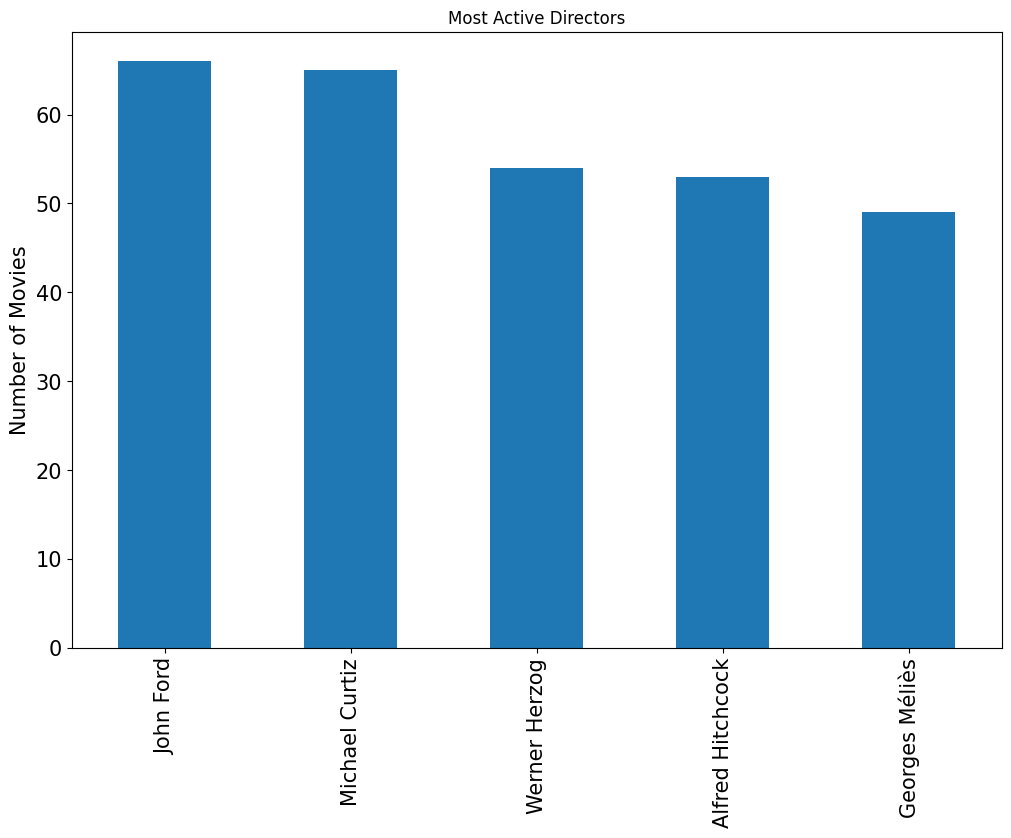

In [60]:
plt.figure(figsize=(12,8))
df.director.value_counts().head().plot(kind = 'bar', fontsize=15)
plt.title('Most Active Directors')
plt.ylabel('Number of Movies', fontsize=15)
plt.show()

In [61]:
df.groupby('director').revenue_musd.sum().nlargest()

director
Steven Spielberg    9256.621422
Peter Jackson       6528.244659
Michael Bay         6437.466781
James Cameron       5900.610310
David Yates         5334.563196
Name: revenue_musd, dtype: float64

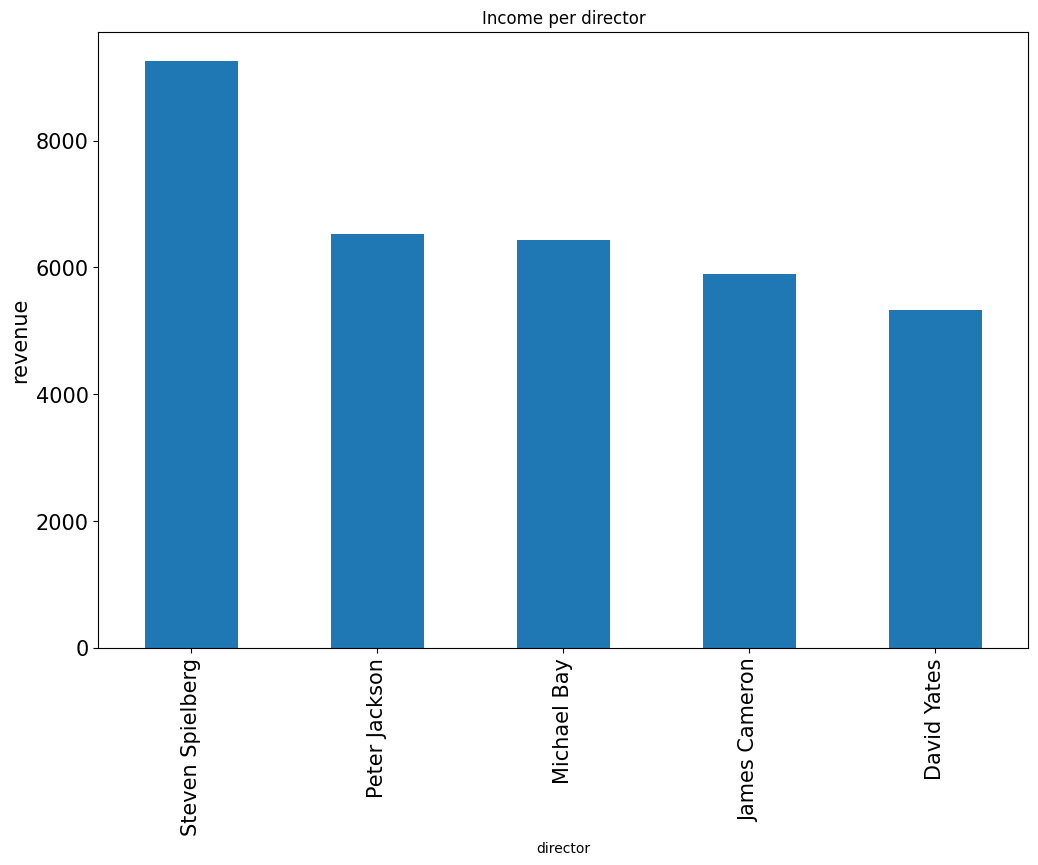

In [62]:
plt.figure(figsize=(12,8))
df.groupby('director').revenue_musd.sum().nlargest().plot(kind = 'bar', fontsize=15)
plt.title('Income per director')
plt.ylabel('revenue', fontsize=15)
plt.show()

In [63]:
df.loc[df.genres.str.contains('Horror', na = False)].groupby('director').revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson     982.288069
James Wan              861.308375
Wes Craven             834.932742
Francis Lawrence       816.233738
Ridley Scott           689.004312
Marc Forster           531.865000
Steven Spielberg       500.104919
William Friedkin       466.403172
Darren Lynn Bousman    456.342667
M. Night Shyamalan     375.372060
Henry Joost            349.073570
David R. Ellis         348.742016
Adrian Lyne            346.110837
James DeMonaco         316.699354
Stephen Sommers        311.460501
Gore Verbinski         275.908490
Guillermo del Toro     261.629364
John R. Leonetti       255.273813
Fede Alvarez           254.643797
Jordan Peele           252.434250
Name: revenue_musd, dtype: float64

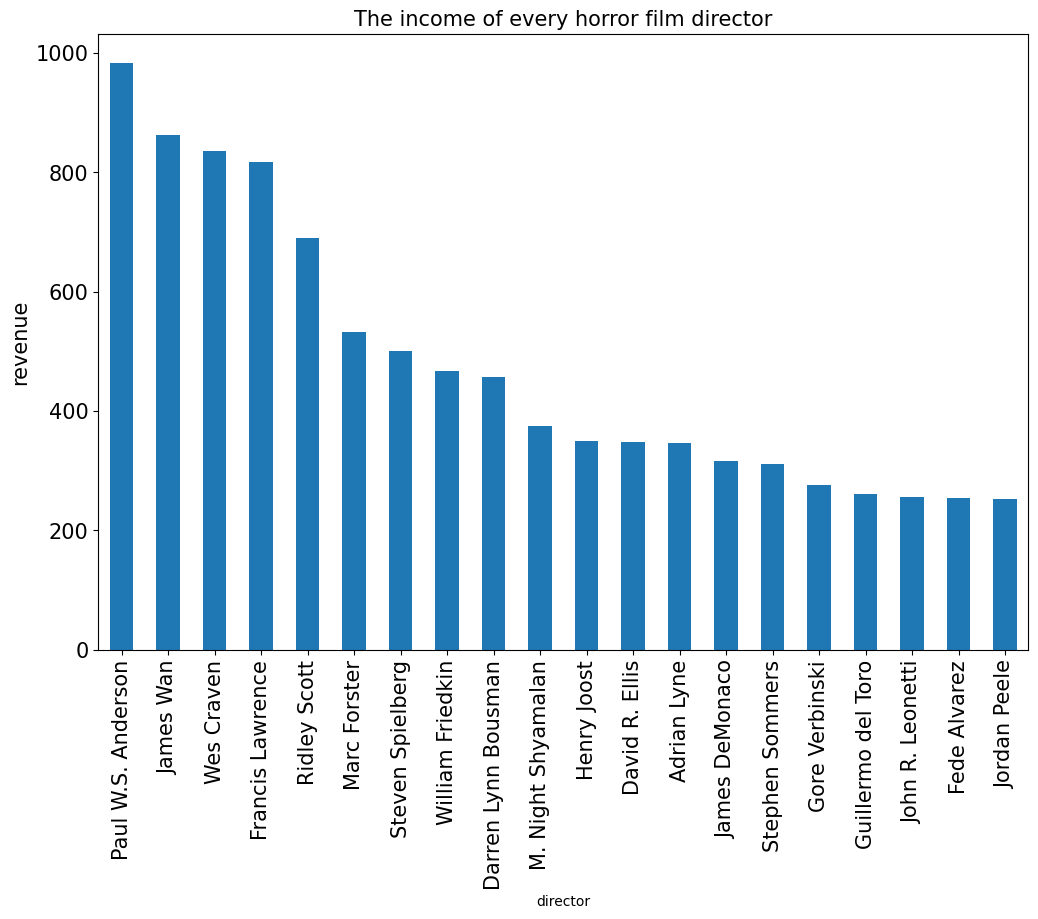

In [64]:
plt.figure(figsize=(12,8))
df.loc[df.genres.str.contains('Horror', na = False)].groupby('director').revenue_musd.sum().nlargest(20).plot(kind = 'bar', fontsize=15)
plt.title('The income of every horror film director', fontsize=15)
plt.ylabel('revenue', fontsize=15)
plt.show()

In [65]:
df.set_index('id', inplace = True)

In [66]:
act = df.cast.str.split('|', expand = True)
act

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,...,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,...,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,...,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,...,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,...,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,...,None,None,None,None,None,None,None,None,None,None


In [67]:
act = act.stack().reset_index(level =1, drop = True).to_frame()
act

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [68]:
act.columns = ['actors']
act.head()

,actors
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn


# **Merging Table**

In [69]:
act = act.merge(df[['title', 'budget_musd', 'revenue_musd', 'vote_average', 'popularity']], how = 'left', left_index = True, right_index=True)
act

,actors,title,budget_musd,revenue_musd,vote_average,popularity
id,,,,,,
2,Turo Pajala,Ariel,NaN,NaN,7.1,3.860491
2,Susanna Haavisto,Ariel,NaN,NaN,7.1,3.860491
2,Matti Pellonpää,Ariel,NaN,NaN,7.1,3.860491
2,Eetu Hilkamo,Ariel,NaN,NaN,7.1,3.860491
3,Matti Pellonpää,Shadows in Paradise,NaN,NaN,7.1,2.292110
...,...,...,...,...,...,...
469172,Vasco Sequeira,Manuel on the Island of Wonders,NaN,NaN,NaN,0.001097
469172,Armanda Bacelar,Manuel on the Island of Wonders,NaN,NaN,NaN,0.001097
469172,Rafael de Sousa,Manuel on the Island of Wonders,NaN,NaN,NaN,0.001097


In [70]:
act.actors.nunique()

201501

In [71]:
act.actors.value_counts().head()

Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
Name: actors, dtype: int64

In [72]:
agg = act.groupby('actors').agg(total_revenue = ('revenue_musd', 'sum'), mean_revenue = ('revenue_musd', 'mean'),
                                mean_rating = ('vote_average', 'mean'), mean_popularity = ('popularity', 'mean'),
                                total_movies = ('actors', 'count'))
agg.nlargest(10, 'total_movies')

,total_revenue,mean_revenue,mean_rating,mean_popularity,total_movies
actors,,,,,
Bess Flowers,368.913259,14.756530,6.184186,2.030528,240
Christopher Lee,9417.047887,324.725789,5.910204,4.749606,148
John Wayne,236.094000,11.242571,5.712097,3.092939,125
Samuel L. Jackson,17109.620672,213.870258,6.266116,11.703945,122
Michael Caine,8053.404838,191.747734,6.269444,8.265272,110
Gérard Depardieu,1247.608953,95.969919,6.053211,3.703836,109
John Carradine,255.839586,19.679968,5.546667,2.434950,109
Donald Sutherland,5390.766679,138.224787,6.233962,7.003230,108
Jackie Chan,4699.185933,146.849560,6.275701,5.862638,108


In [73]:
agg.nlargest(10, 'mean_popularity')

,total_revenue,mean_revenue,mean_rating,mean_popularity,total_movies
actors,,,,,
Alex Dowding,1156.730962,1156.730962,6.4,547.488298,1
Adam Sef,820.580447,820.580447,7.2,294.337037,1
Amber Doyle,820.580447,820.580447,7.2,294.337037,1
Andrea Vasiliou,820.580447,820.580447,7.2,294.337037,1
Ann Wolfe,820.580447,820.580447,7.2,294.337037,1
Ben Kelleher,820.580447,820.580447,7.2,294.337037,1
Betty Adewole,820.580447,820.580447,7.2,294.337037,1
Brooke Ence,820.580447,820.580447,7.2,294.337037,1
Caitlin Burles,820.580447,820.580447,7.2,294.337037,1


In [74]:
agg.nlargest(10, 'total_revenue')

,total_revenue,mean_revenue,mean_rating,mean_popularity,total_movies
actors,,,,,
Stan Lee,19414.957555,647.165252,6.513043,29.936175,48
Samuel L. Jackson,17109.620672,213.870258,6.266116,11.703945,122
Warwick Davis,13256.032188,662.801609,6.294118,13.088614,34
Frank Welker,13044.152470,326.103812,6.310377,9.571404,107
John Ratzenberger,12596.126073,449.861645,6.484444,10.959477,46
Jess Harnell,12234.608163,611.730408,6.435294,10.919015,35
Hugo Weaving,11027.578473,459.482436,6.473684,10.967890,40
Ian McKellen,11015.592318,478.938796,6.353488,15.447180,44
Johnny Depp,10653.760641,217.423687,6.440580,12.378196,69


In [75]:
agg[agg.total_movies > 20].nlargest(10, 'mean_rating')

,total_revenue,mean_revenue,mean_rating,mean_popularity,total_movies
actors,,,,,
Maaya Sakamoto,128.577685,21.429614,7.339286,3.844869,28
Kemal Sunal,0.698200,0.698200,7.295238,0.572455,21
Kamatari Fujiwara,0.327081,0.163541,7.254545,3.998702,23
Alfred Hitchcock,163.404055,13.617005,7.241667,8.793663,24
Toshirō Mifune,32.124151,10.708050,7.235000,3.990092,40
Tatsuya Nakadai,4.341494,2.170747,7.188235,3.188137,35
Colin Kenny,49.385846,9.877169,7.119048,4.685666,23
Eitarô Ozawa,4.100000,4.100000,7.115000,1.029473,22
Eijirô Tôno,29.820132,14.910066,7.093750,2.853840,32
